<a href="https://colab.research.google.com/github/Scott-Huston/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Scott_Huston_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [2]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=53.46432941662476, pvalue=2.4567919354976966e-12)


In [3]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.5, 0.5, 0.6666666666666666, 0.5, 0.6666666666666666, 0.3333333333333333, 0.5, 0.5833333333333334, 0.75, 0.5, 0.5, 0.6666666666666666, 0.5, 0.25, 0.4166666666666667, 0.3333333333333333, 0.5833333333333334, 0.3333333333333333, 0.6666666666666666, 0.75, 0.5833333333333334, 0.6666666666666666, 0.6666666666666666, 0.75, 0.4166666666666667, 0.75, 0.5, 0.5, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.75, 0.5, 0.3333333333333333, 0.8333333333333334, 0.5, 0.6666666666666666, 0.6666666666666666, 0.25, 0.3333333333333333, 0.5833333333333334, 0.16666666666666666, 0.5833333333333334, 0.4166666666666667, 0.6666666666666666, 0.3333333333333333, 0.25, 0.6666666666666666, 0.5833333333333334, 0.5, 0.4166666666666667, 0.5833333333333334, 0.3333333333333333, 0.5, 0.5, 0.3333333333333333, 0.25, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.5, 0.6666666666666666, 0.8333333333333334, 0.3333333333333333, 0.416666666666

In [7]:
df = pd.DataFrame({'a': one_sample})
df.head()

,a
0,1
1,1
2,0
3,1
4,0


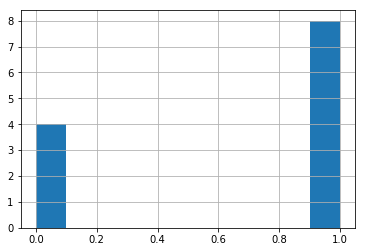

In [8]:
df.a.hist()

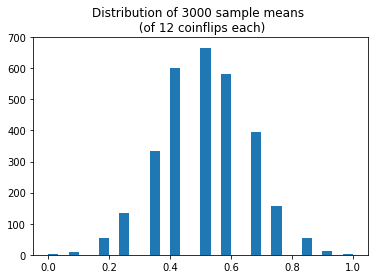

In [9]:
ax = plt.hist(sample_means, bins=30)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [10]:
import numpy as np
import pandas as pd

lambda_heights = np.random.uniform(4.5,6.5,size = 2000)
print(len(lambda_heights))
lambda_heights

2000


array([5.23774314, 5.44186869, 4.6457674 , ..., 5.32387653, 5.33218643,
       6.22757463])

In [11]:
print('Population mean: ', lambda_heights.mean())
print('Population std. dev: ', lambda_heights.std())

Population mean:  5.48583874818832
Population std. dev:  0.574541268902564


In [12]:
population = pd.DataFrame({'Heights': lambda_heights})
print(population.shape)
population.head()

(2000, 1)


,Heights
0,5.237743
1,5.441869
2,4.645767
3,4.739339
4,6.422188


In [13]:
sample = population.sample(100)
print(sample.shape)
sample.head()

(100, 1)


,Heights
701,5.096761
1137,6.084165
1696,5.630355
1781,5.551266
1141,4.685610


In [14]:
print('Sample Mean 1: ', sample['Heights'].mean())

Sample Mean 1:  5.530847590811471


In [15]:
sample = population.sample(100)
print(sample.shape)
sample.head()

(100, 1)


,Heights
1902,6.256988
736,5.030322
1196,4.631604
342,6.419051
1001,5.635580


In [16]:
print('Sample Mean 2: ', sample['Heights'].mean())

Sample Mean 2:  5.481958391413726


## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [17]:
coinflips_100 = np.random.binomial(n = 1, p=.5, size=100)

sample_std = np.std(coinflips_100)
print('Sample std.: ', sample_std)
sample_size = len(coinflips_100)
print('Sample size: ', sample_size)

Sample std.:  0.5
Sample size:  100


In [18]:
standard_error = sample_std/(sample_size**(.5))
print('Standard error = ', standard_error)

Standard error =  0.05


In [19]:
from scipy import stats

std_err = stats.sem(coinflips_100, ddof = 0)
print('Standard error = ', std_err)

Standard error =  0.05


In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

**What confidence level do we want our confidence interval to represent?**

95% confidence Interval? 99% confidence interval?

In [0]:
t = stats.t.ppf(.975, sample_size-1)

In [0]:
sample_mean = coinflips_100.mean()

In [23]:
confidence_interval = [sample_mean - t*std_err, sample_mean + t*std_err]

margin_of_error = t*std_err

print('Sample mean = ', sample_mean)
print('Standard error = ', std_err)
print('Confidence interval = ', confidence_interval)

Sample mean =  0.5
Standard error =  0.05
Confidence interval =  [0.40078915242456586, 0.5992108475754341]


In [24]:
confidence_interval[0]

0.40078915242456586

In [25]:
confidence_interval[1]

0.5992108475754341

## Graphically Represent a Confidence Interval

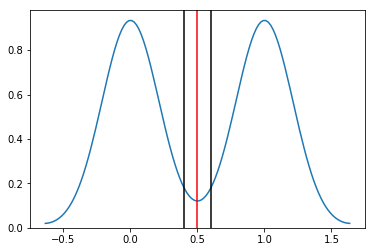

In [26]:
import seaborn as sns
sns.kdeplot(coinflips_100)
plt.axvline(confidence_interval[0], color = 'black')
plt.axvline(confidence_interval[1], color = 'black')
plt.axvline(sample_mean, color = 'red')

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [28]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.5333333333333333, 0.5333333333333333, 0.6333333333333333, 0.6333333333333333, 0.43333333333333335, 0.43333333333333335, 0.5, 0.3, 0.4666666666666667, 0.4666666666666667, 0.5, 0.4666666666666667, 0.5666666666666667, 0.5333333333333333, 0.6666666666666666, 0.4, 0.5333333333333333, 0.7, 0.5333333333333333, 0.4666666666666667, 0.5666666666666667, 0.36666666666666664, 0.4666666666666667, 0.43333333333333335, 0.3, 0.5, 0.43333333333333335, 0.4, 0.6333333333333333, 0.43333333333333335, 0.4, 0.7, 0.6333333333333333, 0.43333333333333335, 0.43333333333333335, 0.5666666666666667, 0.5333333333333333, 0.4666666666666667, 0.5666666666666667, 0.6333333333333333, 0.4, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.5, 0.5333333333333333, 0.6666666666666666, 0.5, 0.5333333333333333, 0.36666666666666664, 0.6, 0.43333333333333335, 0.4666666666666667, 0.5, 0.6, 0.5333333333333333, 0.5, 0.43333333333333335, 0.5666666666666667, 0.5, 0.5, 0.3333333333333333, 0.4666666666666667, 0.33333333333

In [29]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.4760368255487367, 0.5112965077845968)


In [30]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.4760368255487367, 0.5112965077845968)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [31]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=0.41267882715815696, pvalue=0.680734293468082)

A null hypothesis that's just outside of our confidence interval == reject



In [32]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=1.3251454786361292, pvalue=0.18817316691375396)

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
df.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [36]:
cut_points = [0,9,19,29,39,49,1000]
label_names = ['0-9', '10-19', '20-29','30-39','40-49','50+']
df['hours-per-week-categories'] = pd.cut(df['hours-per-week'], cut_points, labels = label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours-per-week-categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [37]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [38]:
df['hours-per-week-categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours-per-week-categories, dtype: int64

In [39]:
df = df.sort_values(by = 'hours-per-week-categories', ascending = True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours-per-week-categories
31290,55,Self-emp-not-inc,41938,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,8,United-States,<=50K,0-9
5172,32,NaN,134886,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,0,2,United-States,>50K,0-9
22928,17,NaN,332666,10th,6,Never-married,NaN,Own-child,White,Female,0,0,4,United-States,<=50K,0-9
7902,35,Private,359131,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,7298,0,8,NaN,>50K,0-9
6604,41,Private,406603,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,6,Iran,<=50K,0-9


In [40]:
contingency_table = pd.crosstab(df['sex'], df['hours-per-week-categories'], margins = True)
contingency_table

hours-per-week-categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [41]:
female_count = contingency_table.iloc[0][0:6].values
female_count

array([ 235,  671, 1287, 1914, 5636, 1028])

In [42]:
male_count = contingency_table.iloc[1][0:6].values
male_count

array([  223,   575,  1105,  1753, 12700,  5434])

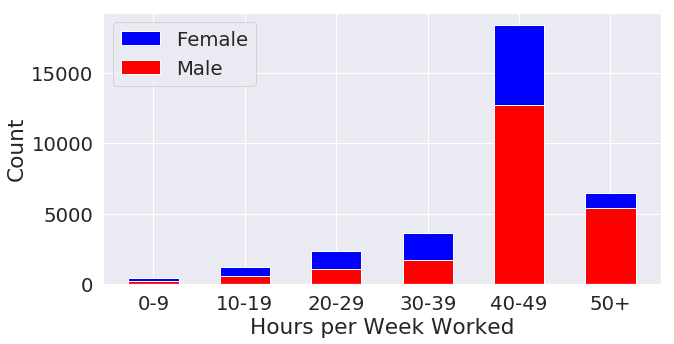

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10,5))
sns.set(font_scale = 1.8)
categories = label_names
p1 = plt.bar(categories, male_count, .55, color = 'red')
p2 = plt.bar(categories, female_count, .55, color = 'blue', bottom = male_count)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()


## Expected Value Calculation

In [44]:
# Get row sums
row_sums = contingency_table.iloc[0:2,6].values
col_sums = contingency_table.iloc[2,0:6].values

print(col_sums)
row_sums

[  458  1246  2392  3667 18336  6462]


array([10771, 21790])

In [45]:
total = contingency_table.loc['All', 'All']
total

32561

In [46]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [47]:
observed = pd.crosstab(df['sex'], df['hours-per-week-categories'].values)
print(observed.shape)
observed

(2, 6)


col_0,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,235,671,1287,1914,5636,1028
Male,223,575,1105,1753,12700,5434


## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [48]:
chi_squared = np.array(((observed - expected)**2/(expected))).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 2287.190943926107


In [49]:
# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")     

Degrees of Freedom: 5


## Run a $\chi^{2}$ Test using Scipy

In [50]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))
                                                            

Chi-Squared: 2287.190943926107
P-value: 0.0
Degrees of Freedom: 5
Expected: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [51]:
# TODO - your code!

import pandas as pd
import numpy as np

# Loading and cleaning data

column_headers = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                 'el-salvador-aid', 'religions-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 
                 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names = column_headers)

df.replace('?', np.NaN, inplace = True)
df.replace('n', 0, inplace = True)
df.replace('y', 1, inplace = True)

df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religions-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [52]:
# Generating and numerically representing the confidence interval for the mean 
# proportion of congress members supporting the synfuels corporation cutback

from scipy.stats import t

synfuels = df['synfuels-corporation-cutback'].dropna()

deg_freedom = len(synfuels)

mean = synfuels.mean()

std_dev = np.std(synfuels)

std_err = std_dev / (len(synfuels**2))

CI = t.interval(.95, deg_freedom, loc=mean, scale=std_err)
                     
print(CI)

(0.3600365733576174, 0.3646011078018029)


(0, 1)

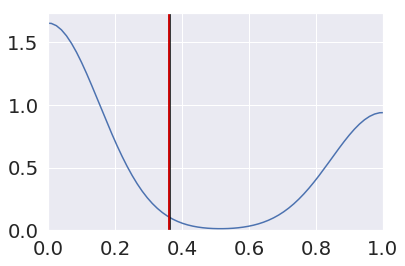

In [53]:
# Here's one plot, but it doesn't represent the interval well

import seaborn as sns

sns.kdeplot(synfuels, legend = False)
plt.axvline(x = CI[0], color = 'black')
plt.axvline(x = CI[1], color = 'black')
plt.axvline(x = synfuels.mean(), color = 'red')
plt.xlim(0,1)

(0.35, 0.375)

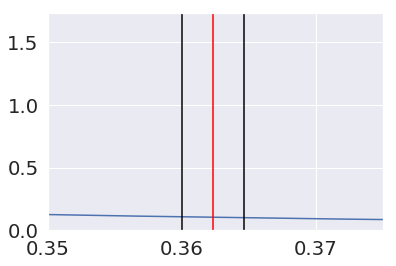

In [54]:
# This is a better representation of the CI, but doesn't 
# show the density plot as well

sns.kdeplot(synfuels, legend = False)
plt.axvline(x = CI[0], color = 'black')
plt.axvline(x = CI[1], color = 'black')
plt.axvline(x = synfuels.mean(), color = 'red')
plt.xlim(.35,.375)

**Interpreting the Confidence Interval**

The standard wording would be something like:

"This confidence interval tells me that I can be 95% confident that the true proportion of congress members who would vote for the synfuels corporation cutback bill is between .35 and .375."

Honestly though, in this case it doesn't make a lot of sense because this isn't really a sample. These are all of the members of the House of Representatives so it doesn't make sense to try to estimate some sort of population mean from this as if it was a sample. Maybe you could try to interpret it as if this particular group of members of congress are a sample of all of the people who have ever been members. That doesn't really work though, because their votes are not independent of each other in that case because they are a product of their time and political climate.

Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [55]:
# Loading dataset
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [56]:
# Filtering to only 2 columns
entities = entities[['landlocked', 'main_religion_2008']].dropna()
entities.head()

,landlocked,main_religion_2008
1,coastline,christian
2,landlocked,muslim
3,coastline,christian
4,coastline,christian
7,coastline,muslim


In [57]:
# Checking for null values
entities.isnull().sum()

landlocked            0
main_religion_2008    0
dtype: int64

In [58]:
observed = pd.crosstab(entities['landlocked'], entities['main_religion_2008'], margins = True)
observed

main_religion_2008,christian,eastern_religions,muslim,All
landlocked,,,,
coastline,126,12,36,174
landlocked,27,3,12,42
All,153,15,48,216


In [59]:
row_sums = observed.iloc[0:2, 3].values
row_sums

array([174,  42])

In [60]:
col_sums = observed.iloc[2,0:3].values
col_sums

array([153,  15,  48])

In [61]:
total = observed.loc['All', 'All']
total

216

In [62]:
expected = []

for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 3)
[[123.25        12.08333333  38.66666667]
 [ 29.75         2.91666667   9.33333333]]


In [63]:
observed = np.array(pd.crosstab(entities['landlocked'], entities['main_religion_2008'], margins = False))
observed

array([[126,  12,  36],
       [ 27,   3,  12]])

In [64]:
chi_squared = ((observed - expected)**2/(expected)).sum()
print(chi_squared)

1.2643291799478407


In [65]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 1.2643291799478407
P-value: 0.5314402049505296
Degrees of Freedom: 2
Expected: 
 [[123.25        12.08333333  38.66666667]
 [ 29.75         2.91666667   9.33333333]]


**Interpreting the Chi-squared test:**

Because the p-value is very high, whether a country is landlocked appears to be independent of the country's religion. I fail to reject the null hypothesis that the variables are independent.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)